In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use("fivethirtyeight")

In [ ]:
########
# Part 1
########

In [ ]:
#1

X = np.random.rand(10,3)
Y = np.random.rand(3)

# Ans -> (c) This will fail. Because of the incompatibility.

In [ ]:
#2(a)
x, y = np.mgrid[:10, :5]
z = x + y

'''
Ans ->

x = (10,1)
y = (1,5)
z = (10,5)
'''

In [ ]:
#2(b)
x, y = np.ogrid[:10, :5]
z = x + y

'''
Ans ->

x = (10,1)
y = (1,5)
z = (10,5)
'''

In [ ]:
#3

#Referred - https://discuss.dizzycoding.com/what-is-the-purpose-of-meshgrid-in-python-numpy/

'''
Ans ->
OGrid offer sparse storage. Hence, it might offer memory advantage in case of large grids
'''

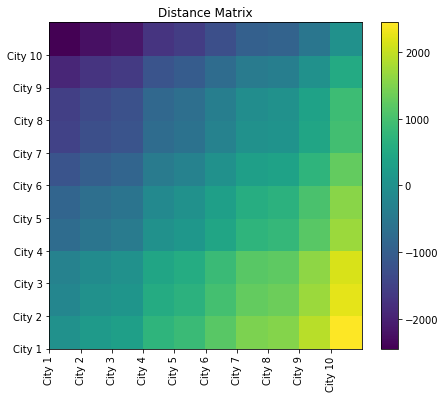

In [ ]:
#4
def distCalc(cityIdx : int, distVector : list):
  return [item - distVector[cityIdx] for item in distVector]

'''
Assuming that the cities are placed linearly
'''
nCities = 10
cityLabels = ['City 1', 'City 2', 'City 3', 'City 4', 'City 5', 'City 6', 'City 7', 'City 8', 'City 9', 'City 10']
Distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
dMatrix = distCalc(0,Distances)
for h in range(1,nCities):
  dMatrix = np.vstack((dMatrix,distCalc(h,Distances)))

plt.figure(figsize=(7, 6))
plt.pcolormesh(dMatrix)
plt.colorbar()
plt.title('Distance Matrix')
plt.xticks(range(10), cityLabels, rotation ='vertical')
plt.yticks(range(10), cityLabels, rotation ='horizontal')
plt.show()

In [ ]:
#5

T = [[1, 2, 3], [ 4, 5, 6], [7, 8, 9]]
Q = list(T)
T[1][0] = 100000
print('Showing that Q is simply pointing to T')
print(Q)

'''
In the first case Q is merely pointing to T. Hence any change in T is effectively a change in Q. 
'''


import copy

T = [[1, 2, 3], [ 4, 5, 6], [7, 8, 9]]
Q = copy.deepcopy(T)
T[1][0] = 100000
print('Showing that Q is now decoupled from T')
print(Q)

Showing that Q now decoupled from T
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [ ]:
#6

X = np.array([5, 9, 77, 0, 74, 55, 81, 79, 90])
Y = np.array([5, 1, 46, 2, 10, 29, 55, 4, 90])

#(a)
print('Values in X > Y \n')
print(X[X > Y])
print('\n Indexes where X > Y \n')
isGreater = [X[item] > Y[item] for item in range(9)]
print([i for i,j in enumerate(isGreater) if j])


#(b)
print('\n Indexes where X == Y \n')
isEqual = (X==Y)
print([i for i,j in enumerate(isEqual) if j])


Values in X > Y 

[ 9 77 74 55 81 79]

 Indexes where X > Y 

[1, 2, 4, 5, 6, 7]

 Indexes where X == Y 

[0, 8]


In [ ]:
###########
# Part - 2
###########

import torch
import torchvision
import torchvision.datasets as datasets
mnist = datasets.MNIST(root="./", download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



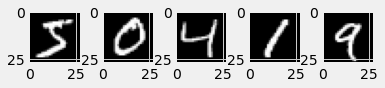

In [ ]:
#1(a)

for _i in range(5):
  img, label = mnist[_i]
  plt.subplot(1,5,_i+1)
  plt.imshow(img,cmap=plt.get_cmap('gray'))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

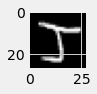

In [ ]:
#1(b)

img3,lab3 = mnist[2]
plt.figure(figsize=(1,1))
plt.imshow(np.flip(np.transpose(img3),0),cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#1(c)
batchSize = 10
mnist_batch = [] 
#Load Images
for _j in range(batchSize):
  _i,_l = mnist[_j]
  mnist_batch.append(np.asarray(_i))
flatBatch = np.asarray(mnist_batch).flatten() #length is correct 10*784

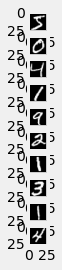

In [ ]:
#1(d)

for _i in range(batchSize):
  img = flatBatch[_i*784 : (_i+1)*784].reshape(28,28)
  plt.subplot(batchSize,1,_i+1)
  plt.imshow(img,cmap=plt.get_cmap('gray'))

plt.show()


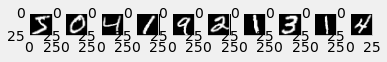

In [ ]:
#1(e)

for _i in range(batchSize):
  img = flatBatch[_i*784 : (_i+1)*784].reshape(28,28)
  plt.subplot(1,batchSize,_i+1)
  plt.imshow(img,cmap=plt.get_cmap('gray'))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

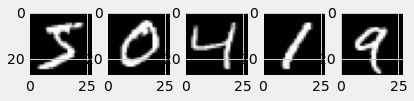

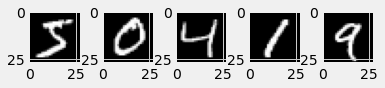

In [ ]:
#1(f)
import math
flatBatch1 = flatBatch[:math.floor(batchSize/2)*784] #First Half Batch
flatBatch2 = flatBatch[math.floor(batchSize/2)*784:] #Second Half Batch

batchSize1 = int(len(flatBatch1)/784)
batchSize2 = int(len(flatBatch2)/784)


for _i in range(batchSize1):
  img = flatBatch1[_i*784 : (_i+1)*784].reshape(28,28)
  plt.subplot(1,batchSize1,_i+1)
  plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()


for _j in range(batchSize2):
  img = flatBatch[_j*784 : (_j+1)*784].reshape(28,28)
  plt.subplot(1,batchSize2,_j+1)
  plt.imshow(img,cmap=plt.get_cmap('gray'))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
#2(a)
'''
We simply divide each value in the numpy array by 255
'''

normalizedMNISTBatch = [item/255.0 for item in mnist_batch]

In [ ]:
#2(b)

meanNormalizedMNISTBatch = [np.mean(item) for item in normalizedMNISTBatch]

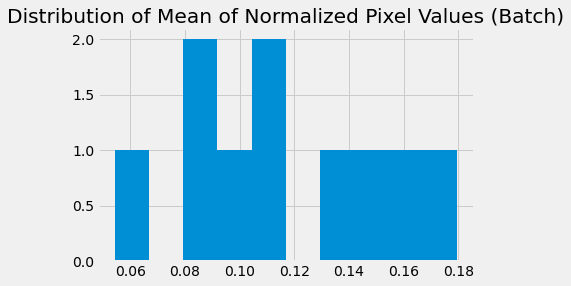

In [ ]:
#2(c)
plt.hist(meanNormalizedMNISTBatch)
plt.title("Distribution of Mean of Normalized Pixel Values (Batch)")
plt.show()

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


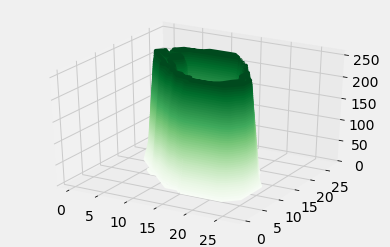

In [ ]:
#2(d)
from mpl_toolkits import mplot3d

#Define a function to extract Pixel Value from Coordinate
def getValue(x,y,imgArray):
  return imgArray[x,y]

#Choose an Image
img1, lab1 = mnist[1]

#Prep Data
xdata = list(range(28))
ydata = list(range(28))
X, Y = np.meshgrid(xdata, ydata)
eqArray = np.asarray(img1)
zdata = getValue(X,Y,eqArray)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xdata, ydata, zdata, 50, cmap='Greens');
fig.show()

In [ ]:
#2(e)

#Create the Datasets X,y
XSet = []
ySet = []
for _u in range(len(mnist)):
  img,label = mnist[_u]
  XSet.append(img)
  ySet.append(label)

#Sort by Label
idx = np.argsort(ySet)
#Pick in the order of Index
XSetSorted = map(XSet.__getitem__, idx)
ySetSorted = map(ySet.__getitem__, idx)

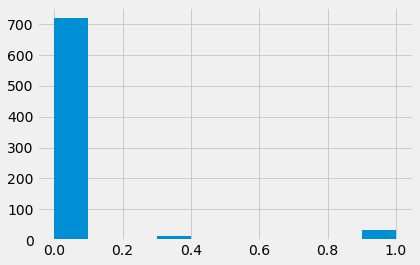

In [ ]:
#2(f)

#Choose an image, flatten and normalize

img_random, _ = mnist[30270]
img_random_array = np.asarray(img_random).flatten()/255.0

#Plot Histogram
plt.hist(img_random_array)
plt.show()

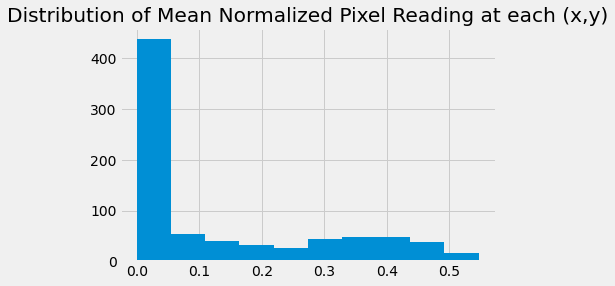

In [ ]:
#2(g)

#Flatten an image to create a 1D np array
def preProcess(Idx):
  img_random, _ = mnist[Idx]
  return np.asarray(img_random).flatten()/255.0

#Average all 60,000 arrays element by element => One array of Dimension [28*28]
flatNormCollection = [preProcess(item) for item in range(60000)]
grandAverageArray = np.mean(np.asarray(flatNormCollection), axis = 0)

#Plot Histogram on this aggregated array
plt.hist(grandAverageArray)
plt.title("Distribution of Mean Normalized Pixel Reading at each (x,y)")
plt.show()

In [ ]:
#2(h)
meanNormalizedMNIST = [item/np.mean(item) for item in mnist_batch]

In [ ]:
###########
# Part - 3
###########

In [ ]:
#1

'''
Lists -> Storing streaming data as its generated.
Sets -> Storing data while throwing away duplicates.
Tuples -> Storing data in the same way as lists but we want to ensure immutability.
Dictionaries -> Storing data along with its metadata in a one-one corresspondance. 
'''

In [ ]:
#2

'''
Illustation of SOLID principles.
'''

#Single Responsibility 

'''
To Solve the Heat Equation, we encapsulate the equation and Mesh separately.
'''

import numpy as np

class OneDHeatEq:
  def __init__(self,xBC,xBCValue):
    self.x0 = xBC
    self.x0Value = xBCValue
  
  def sineForcingFunction(self,x):
    return -(np.pi**2)*(np.sin(np.pi*x))

class Mesh:
  def __init__(self, geometry):
    self.geom = geometry
  def drawGrids(self,resolution):
    pass
  def linearShapeFunc(self):
    pass


#Open Closed Principle 

'''
We specialize Mesh class by adding Quadratic Shape Functions
'''

class ExtraFnMesh(Mesh):
  def quadraticShapeFunc(self):
    pass




#Liskov Substitution

'''
We want to modify the drawGrids method in a child class to make the gridding adaptive.
'''

class AdpativeMesh(Mesh):
  def drawGrids(self, resolution):
    pass



#Interface Segregation

'''
We separate out the Shape Function in Mesh class by putiing it in a separate class
'''

class Mesh:
  def __init__(self, geometry):
    self.geom = geometry
  def drawGrids(self,resolution):
    pass

class ShapeFn:
  def linearShapeFunc(self):
    pass


#Depedency Inversion

'''
Instead of defining geometries ourselves, we adapt our Mesh class to import any geometry defined externally.
'''

class Geometry:
  pass

class Mesh(Geometry):
  def drawGrids(self, resolution, geom : Geometry):
    pass



In [ ]:
#3

def ingestParams(runNumb: int):
  if(sys.argv[0]):
    geoms = sys.argv[0]
  
  if(sys.argv[1]):
    numPoints = sys.argv[1]

  #Create a dictionary
  paramsDict = {'geoms' : geoms, 'numPoints' : numPoints}

  #Create a new folder
  folderName = 'ParamFolder_' + str(runCount)
  os.makedirs(folderName)

  #Dump the dictionary within this folder as a YAML

  pklFileName = "./"+folderName+"/params.yaml"
  with open(pklFileName, 'w') as file:
    documents = yaml.dump(paramsDict, file)

  return runNumb + 1


import os
import yaml

with open('config.yml', 'r') as file:
    params = yaml.safe_load(file)

#Reading default values from YAML
geoms = params['geometry']
numPoints = params['numPoints']

#Override defaults from Command line - Since can't call command line in Colab. Simulating this using argv
sys.argv[0] = ['circle','polygon']
sys.argv[1] = [5,50]

#Tracking Runs
runCount = 1

runCount = ingestParams(runCount)



In [ ]:
#4

import sys
import gc

class A:
  def __init__(self) -> None:
    pass


#Instantiate 2 objects of class A

a1 = A()
a2 = A()

print(sys.getrefcount(id(a1))) #Printing out ref count for a1
print(sys.getrefcount(id(a2))) #Printing out ref count for a2
print(gc.get_count())

del a2
gc.collect()
print(gc.get_count())

1
1
(356, 0, 0)
(55, 0, 0)


In [ ]:
#5

from PIL import Image
img = Image.open('SamsClub-CarBatter-Feb2022.png')
rgb_im = img.convert('RGB')
resizedImg = rgb_im.resize((224, 224), Image.ANTIALIAS)
resizedImg.save('resized_image.jpg')

In [ ]:
#6

import h5py
import pickle
import os
from PIL import Image
import scipy.io

import torch
import torchvision
import torchvision.datasets as datasets

#Download MNIST
mnist = datasets.MNIST(root="./", download=True)

#Create a local Directory to save 100 images
os.mkdir('ToSave')

#Create a Numpy array of arrays
imagesArray = []
for j in range(100):
  img, label = mnist[j]
  imagesArray.append(np.asarray(img))

numpy2dImgArray = np.asarray(imagesArray)


#Pickle
with open('./ToSave/PickledImages2',"wb") as f:
    pickle.dump(numpy2dImgArray,f)

print('Pickled Size = ', os.path.getsize("./ToSave/PickledImages2"))


#H5
h5f = h5py.File('./ToSave/data.h5', 'w')
h5f.create_dataset('data' , data=numpy2dImgArray)
h5f.close()

print('H5 Size = ', os.path.getsize("./ToSave/data.h5"))

#Numpy
np.save("./ToSave/images.npy",numpy2dImgArray)
print('NPY Size = ', os.path.getsize("./ToSave/images.npy"))


#NPZ
np.savez("./ToSave/images2.npz",numpy2dImgArray)
print('NPZ Size = ', os.path.getsize("./ToSave/images2.npz"))


#MAT
scipy.io.savemat('./ToSave/images3.mat', {'data': numpy2dImgArray})
print('MAT Size = ', os.path.getsize("./ToSave/images3.mat"))


Pickled Size =  78560
H5 Size =  80448
NPY Size =  78528
NPZ Size =  78664
MAT Size =  78592


In [ ]:
#7

class AllPlots:

  def __init__(self, title = None, color = None, xlab = None, ylab = None, 
               zlab = None, xSeries = None, ySeries = None, 
               zSeries = None, cmap = None, subPlots = None, subPlotRows = None, 
               subPlotCols = None, figLength = None, figWidth = None) -> None:

    self.title = title
    self.color = color
    self.xlab = xlab
    self.ylab = ylab
    self.zlab = zlab
    self.xSeries = xSeries
    self.ySeries = ySeries
    self.zSeries = zSeries
    self.cmap = cmap
    self.subPlots = subPlots
    self.subPlotRows = subPlotRows
    self.subPlotCols = subPlotCols
    self.figLength = figLength
    self.figWidth = figWidth

  def plotHist(self):
    if self.title:
      if self.xSeries:
        if self.xlab:
          if self.color:
            plt.plot(self.xSeries, color= self.color)
            plt.title(self.title)
            plt.xlabel(self.xlab)
            plt.show()
          else:
            plt.plot(self.xSeries, color= "blue")
            plt.title(self.title)
            plt.xlabel(self.xlab)
            plt.show()

        else:
          return " Sorry Please provide a Label for X Axis "
      else:
        return " Sorry Please Provide xSeries Data to Plot Histogram "
    else:
      return " Sorry Please Provide a Title to Plot Histogram "


  def plotScatter(self):
    if self.title:
      if self.xSeries:
        if self.xlab:
          if self.color:
            plt.scatter(self.xSeries, self.ySeries, color= self.color)
            plt.title(self.title)
            plt.xlabel(self.xlab)
            plt.ylabel(self.ylab)
            plt.show()
          else:
            plt.scatter(self.xSeries, self.ySeries, color= "blue")
            plt.title(self.title)
            plt.xlabel(self.xlab)
            plt.ylabel(self.ylab)
            plt.show()

        else:
          return " Sorry Please provide a Label for X Axis and Y Axis "
      else:
        return " Sorry Please Provide xSeries and ySeries Data to Plot "
    else:
      return " Sorry Please Provide a Title to Plot "


  def plotLoss(self):

    '''
    Here in ySeries the function Expects a list of two lists
    '''

    if len(self.ySeries != 2):
      return "Sorry, you need to provide data only for training and testing sets."
    else:
      if self.title:
        if self.xSeries:
          if self.xlab:
              plt.plot(self.xSeries, self.ySeries[0], color= 'blue', label = "Train Loss")
              plt.plot(self.xSeries, self.ySeries[1], color= 'orange', label = "Train Loss")
              plt.legend(loc="upper left")
              plt.title(self.title)
              plt.xlabel(self.xlab)
              plt.ylabel(self.ylab)
              plt.show()
          else:
            return " Sorry Please provide a Label for X Axis and Y Axis "
        else:
          return " Sorry Please Provide xSeries Data to Plot "
      else:
        return " Sorry Please Provide a Title to Loss Plot "


  def multiImagePlot(self, ImgArray):
    '''
    ImgArray = Array of Images to be Plotted
    '''

    # create figure
    fig = plt.figure(figsize=(self.figLength, self.figWidth))
  
    # setting values to rows and column variables
    rows = self.subPlotRows
    cols = self.subPlotCols

    for _k in range(rows*cols):
      fig.add_subplot(rows, cols, _k)
      plt.imshow(ImgArray[_k])
      plt.axis('off')
      plt.title(self.title[_k])

    plt.show()




